In [176]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotting.templates import plot_dens_scatter, plot_n_boxplots
from sklearn.feature_selection import mutual_info_regression

In [177]:
stab_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\SPIS-Resting-State-Dataset\accumulate")
results_folder = pathlib.Path(r"C:\Users\workbench\eirik_master\Results\SPIS-Resting-State-Dataset\results_run_0")

Analysing the epoch distribution of the raw data

In [183]:
quasi_dist_x = np.empty((16, 120))
quasi_dist_y = np.empty((16, 120))
peaks_dist_x = np.empty((16, 120))
peaks_dist_y = np.empty((16, 120))

In [185]:
for i, pth in enumerate((stab_folder / "quasi" / "dis").iterdir()):
    current = np.load(pth)
    quasi_dist_x[i, :] = current.copy()
for i, pth in enumerate((stab_folder / "quasi" / "abs_dis").iterdir()):
    current = np.load(pth)
    quasi_dist_y[i, :] = current.copy()
for i, pth in enumerate((stab_folder / "peaks" / "dis").iterdir()):
    current = np.load(pth)
    peaks_dist_x[i, :] = current.copy()
for i, pth in enumerate((stab_folder / "peaks" / "abs_dis").iterdir()):
    current = np.load(pth)
    peaks_dist_y[i, :] = current.copy()

In [186]:
print(quasi_dist_x.shape)
print(quasi_dist_y.shape)
print(peaks_dist_x.shape)
print(peaks_dist_y.shape)

(16, 120)
(16, 120)
(16, 120)
(16, 120)


In [199]:
mutual_info_regression(peaks_dist_x.flatten().reshape(-1, 1), quasi_dist_y.flatten())

array([0.30898417])

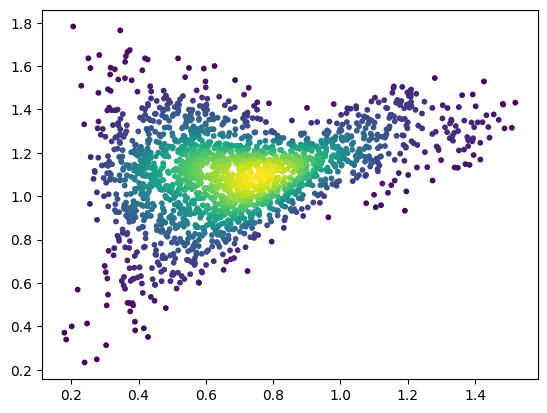

In [202]:
plot_dens_scatter(peaks_dist_x, quasi_dist_x, "Dis Distribution", "dis", "abs_dis")

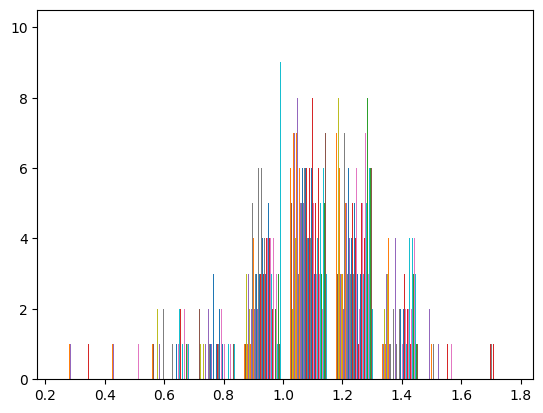

In [ ]:
plt.hist(quasi_dist_x)
plt.show()

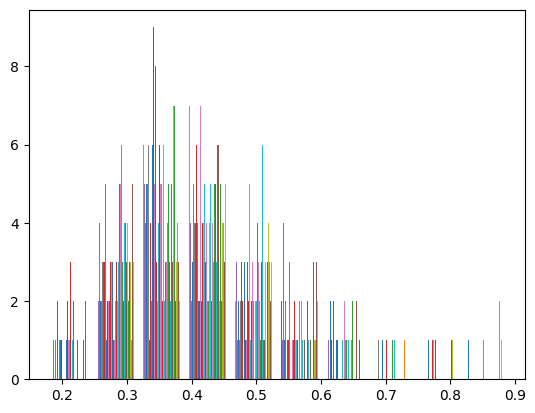

In [ ]:
plt.hist(quasi_dist_y)
plt.show()

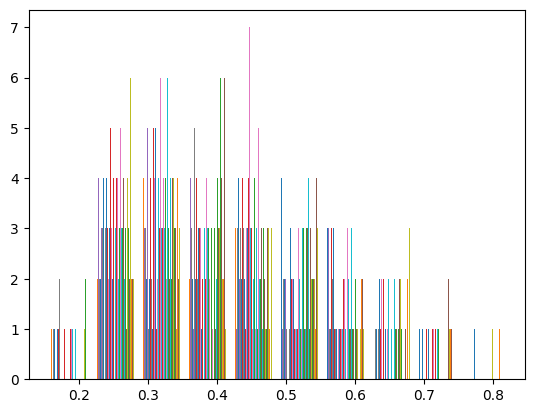

In [ ]:
plt.hist(peaks_dist_y)
plt.show()

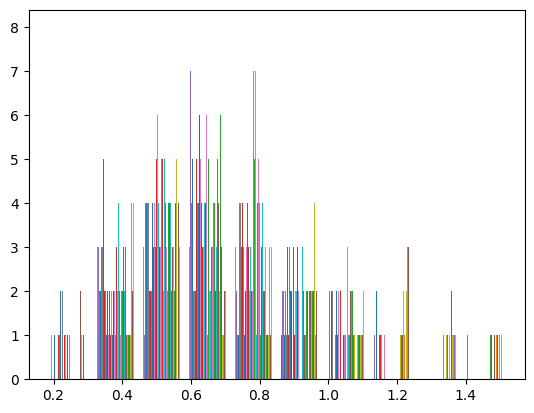

In [ ]:
plt.hist(peaks_dist_x)
plt.show()

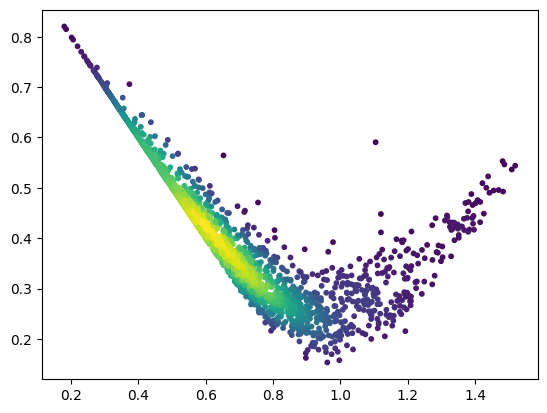

In [ ]:
plot_dens_scatter(peaks_dist_x, peaks_dist_y, "Peaks Dis Distribution", "dis", "abs_dis")

Analysing the epoch distribution of the raw Eyes Closed data

In [ ]:
quasi_dist_x = np.empty((8, 120))
quasi_dist_y = np.empty((8, 120))
peaks_dist_x = np.empty((8, 120))
peaks_dist_y = np.empty((8, 120))

In [ ]:
for i, pth in enumerate((stab_folder / "quasi" / "dis").iterdir()):
    if i%2 != 0:
        continue
    current = np.load(pth)
    quasi_dist_x[int(i/2), :] = current.copy()
for i, pth in enumerate((stab_folder / "quasi" / "abs_dis").iterdir()):
    if i%2 != 0:
        continue
    current = np.load(pth)
    quasi_dist_y[int(i/2), :] = current.copy()
for i, pth in enumerate((stab_folder / "peaks" / "dis").iterdir()):
    if i%2 != 0:
        continue
    current = np.load(pth)
    peaks_dist_x[int(i/2), :] = current.copy()
for i, pth in enumerate((stab_folder / "peaks" / "abs_dis").iterdir()):
    if i%2 != 0:
        continue
    current = np.load(pth)
    peaks_dist_y[int(i/2), :] = current.copy()

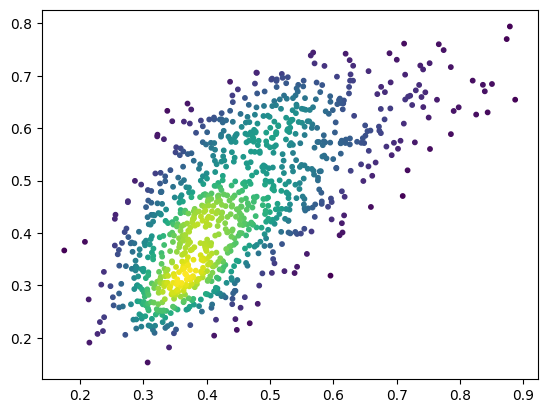

In [ ]:
plot_dens_scatter(quasi_dist_y, peaks_dist_y, "Dis Distribution", "dis", "abs_dis", True)

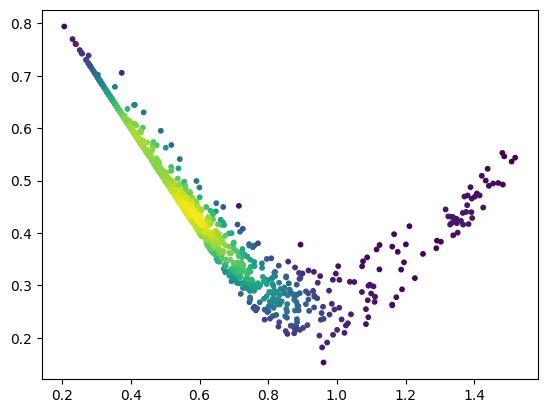

In [ ]:
plot_dens_scatter(peaks_dist_x, peaks_dist_y, "Peaks Dis Distribution", "dis", "abs_dis")

Analysing the epoch distribution of the raw Eyes Closed data

In [ ]:
quasi_dist_x = np.empty((8, 120))
quasi_dist_y = np.empty((8, 120))
peaks_dist_x = np.empty((8, 120))
peaks_dist_y = np.empty((8, 120))

In [ ]:
for i, pth in enumerate((stab_folder / "quasi" / "dis").iterdir()):
    if i%2 == 0:
        continue
    current = np.load(pth)
    quasi_dist_x[int((i-1)/2), :] = current.copy()
for i, pth in enumerate((stab_folder / "quasi" / "abs_dis").iterdir()):
    if i%2 == 0:
        continue
    current = np.load(pth)
    quasi_dist_y[int((i-1)/2), :] = current.copy()
for i, pth in enumerate((stab_folder / "peaks" / "dis").iterdir()):
    if i%2 == 0:
        continue
    current = np.load(pth)
    peaks_dist_x[int((i-1)/2), :] = current.copy()
for i, pth in enumerate((stab_folder / "peaks" / "abs_dis").iterdir()):
    if i%2 == 0:
        continue
    current = np.load(pth)
    peaks_dist_y[int((i-1)/2), :] = current.copy()

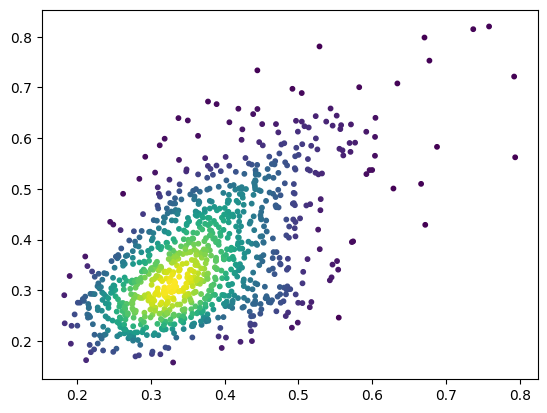

In [ ]:
plot_dens_scatter(quasi_dist_y, peaks_dist_y, "Quasi Dis Distribution", "dis", "abs_dis")

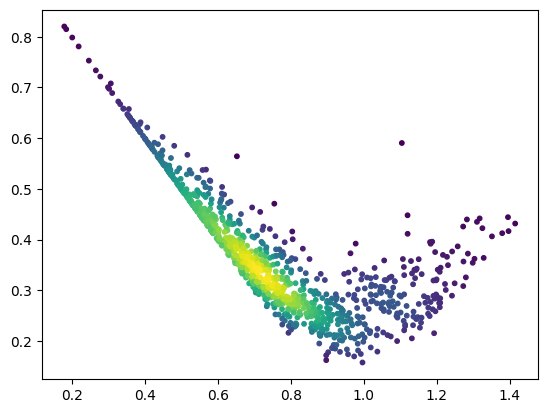

In [ ]:
plot_dens_scatter(peaks_dist_x, peaks_dist_y, "Peaks Dis Distribution", "dis", "abs_dis")

Analysing the effect of different parameters

In [ ]:
all_results = np.empty(
    (
        16,
        2,
        2,
        2,
        2,
        12,
        12,
        5
    )
)

In [ ]:
for i, pth in enumerate(results_folder.iterdir()):
    current = np.load(pth)
    all_results[i, :, :, :, :, :, :] = current.copy()

In [ ]:
all_results = np.nan_to_num(all_results)

In [ ]:
for i in range(16):
    all_results[i, :, :, :, :, :, :, :] -= all_results[i, 1, 1, 1, 1, 0, 0, 0]

Pooled data, to se what works best for both

Best params

In [ ]:
print(np.unravel_index(np.argmax(np.mean(all_results[:, :, :, :, :, :, :, 0], 0)), (2, 2, 2, 2, 12, 12)))
print(np.unravel_index(np.argmax(np.mean(all_results[:, :, :, :, :, :, :, 1], 0)), (2, 2, 2, 2, 12, 12)))
print(np.unravel_index(np.argmax(np.mean(all_results[:, :, :, :, :, :, :, 2], 0)), (2, 2, 2, 2, 12, 12)))
print(np.unravel_index(np.argmax(np.mean(all_results[:, :, :, :, :, :, :, 3], 0)), (2, 2, 2, 2, 12, 12)))
print(np.unravel_index(np.argmax(np.mean(all_results[:, :, :, :, :, :, :, 4], 0)), (2, 2, 2, 2, 12, 12)))

(0, 0, 0, 0, 11, 11)
(0, 0, 0, 1, 4, 9)
(0, 0, 0, 1, 4, 0)
(0, 0, 0, 0, 9, 10)
(1, 0, 1, 1, 4, 7)


c:\Users\workbench\eirik_master\code\Masteroppgave2\env\lib\site-packages\numpy\core\_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


Quasi and peaks distribution of best params solution.

Effect of quasi_channel exclusion

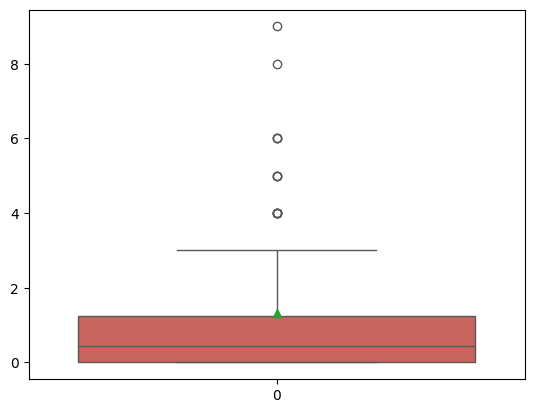

In [ ]:
plot_n_boxplots([all_results[:, 0, 1, 1, 0, 0, 1].flatten()], [sns.xkcd_rgb["pale red"]])

Effect of Peaks_channel exclusion

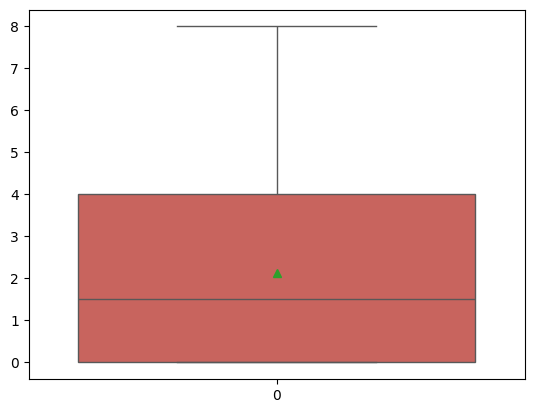

In [ ]:
plot_n_boxplots([all_results[:, 1, 0, 1, 0, 0, 0, 1].flatten()], [sns.xkcd_rgb["pale red"]])

Effect of channel correlation exclusion

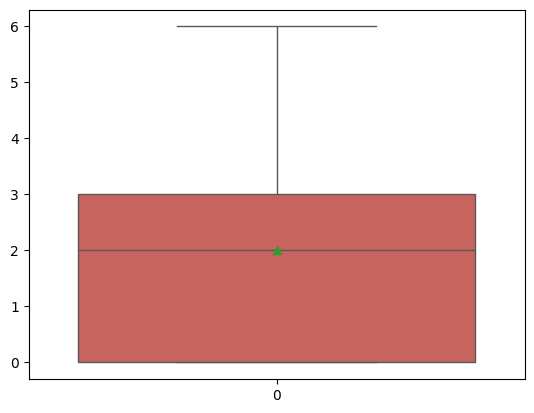

In [ ]:
plot_n_boxplots([all_results[:, 1, 1, 0, 0, 0, 0, 1].flatten()], [sns.xkcd_rgb["pale red"]])

Effect of quasi epoch exclusion

In [ ]:
x_axis = np.arange(0, 12)
y_axis = np.empty(12)
error = np.empty(12)
for i in range(12):
    current = all_results[:, 0, 0, 0, 0, i, 0, 1].copy().flatten()
    y_axis[i] = np.mean(current)
    error[i] = np.std(current)

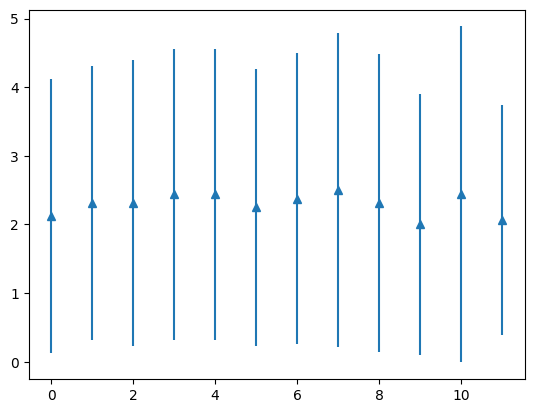

[2.125  2.3125 2.3125 2.4375 2.4375 2.25   2.375  2.5    2.3125 2.
 2.4375 2.0625]


In [ ]:
plt.errorbar(x_axis, y_axis, error, linestyle='None', marker='^')
plt.show()
print(y_axis)

In [ ]:
x_axis = np.arange(0, 12)
y_axis = np.empty(12)
error = np.empty(12)
for i in range(12):
    current = all_results[:, :, :, :, :, i, :, 1].copy().flatten()
    y_axis[i] = np.mean(current)
    error[i] = np.std(current)

c:\Users\workbench\eirik_master\code\Masteroppgave2\env\lib\site-packages\numpy\core\_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
c:\Users\workbench\eirik_master\code\Masteroppgave2\env\lib\site-packages\numpy\core\_methods.py:152: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)


c:\Users\workbench\eirik_master\code\Masteroppgave2\env\lib\site-packages\matplotlib\axes\_axes.py:3683: RuntimeWarning: invalid value encountered in add
  low, high = dep + np.vstack([-(1 - lolims), 1 - uplims]) * err


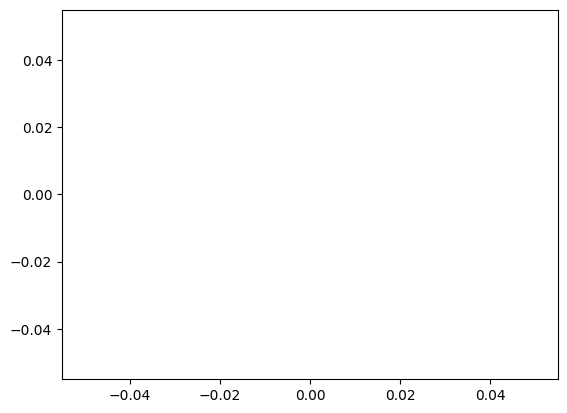

[-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf]


In [ ]:
plt.errorbar(x_axis, y_axis, error, linestyle='None', marker='^')
plt.show()
print(y_axis)

Effect of peaks epoch exclusion

In [ ]:
x_axis = np.arange(0, 12)
y_axis = np.empty(12)
error = np.empty(12)
for i in range(12):
    current = all_results[:, 0, 0, 0, 0, 0, i, 1].copy().flatten()
    y_axis[i] = np.mean(current)
    error[i] = np.std(current)

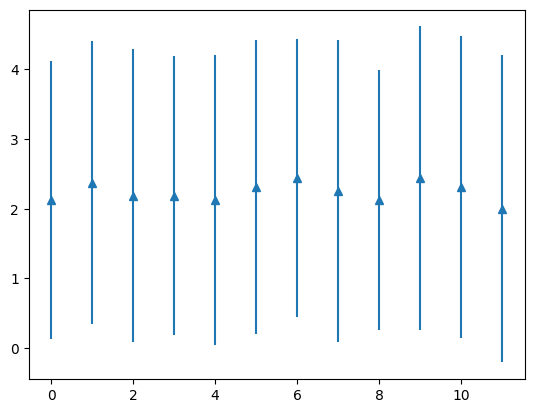

[2.125  2.375  2.1875 2.1875 2.125  2.3125 2.4375 2.25   2.125  2.4375
 2.3125 2.    ]


In [ ]:
plt.errorbar(x_axis, y_axis, error, linestyle='None', marker='^')
plt.show()
print(y_axis)

In [ ]:
x_axis = np.arange(0, 12)
y_axis = np.empty(12)
error = np.empty(12)
for i in range(12):
    current = all_results[:, :, :, :, :, :, i, 1].copy().flatten()
    y_axis[i] = np.mean(current)
    error[i] = np.std(current)

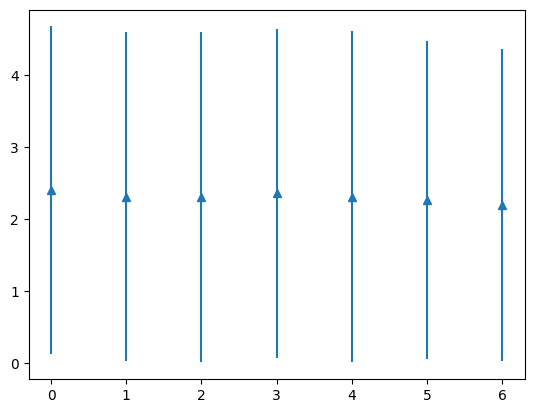

[2.40234375 2.31217448 2.30891927 2.36197917 2.30891927 2.27050781
 2.19954427       -inf       -inf       -inf       -inf       -inf]


In [ ]:
plt.errorbar(x_axis, y_axis, error, linestyle='None', marker='^')
plt.show()
print(y_axis)